In [1]:
import pandas as pd

# Load your dataset
file_path = r'C:\Users\Yibabe\Desktop\ball_bearing\data\LogFile_2022-06-20-17-00-31.csv'
data = pd.read_csv(file_path, header=None, names=['vibration_x', 'vibration_y', 'temp_bearing', 'temp_atmospheric'])

In [8]:
# Add a time index (assuming data is sampled at 25.6 kHz)
data['time'] = data.index / 25600  # Time in seconds

# Define the time window for aggregation (e.g., 1 second)
window_size = 0.2  # seconds
sampling_frequency = 25600  # 25.6 kHz
rows_per_window = int(sampling_frequency * window_size)

In [9]:
# Aggregate data
aggregated_data = data.groupby(data.index // rows_per_window).agg({
    'vibration_x': ['mean', 'std', 'max', 'min'],
    'vibration_y': ['mean', 'std', 'max', 'min'],
    'temp_bearing': ['mean', 'std', 'max', 'min'],
    'temp_atmospheric': ['mean', 'std', 'max', 'min']
})


In [10]:
# Flatten multi-level column names
aggregated_data.columns = ['_'.join(col) for col in aggregated_data.columns]

In [11]:
aggregated_data

,vibration_x_mean,vibration_x_std,vibration_x_max,vibration_x_min,vibration_y_mean,vibration_y_std,vibration_y_max,vibration_y_min,temp_bearing_mean,temp_bearing_std,temp_bearing_max,temp_bearing_min,temp_atmospheric_mean,temp_atmospheric_std,temp_atmospheric_max,temp_atmospheric_min
0,0.013735,0.377047,1.717054,-1.652815,0.012160,0.583499,2.237552,-2.650145,41.612792,0.004474,41.614912,41.603353,24.818753,0.002953,24.824984,24.817354
1,0.010329,0.365089,1.853319,-1.854422,0.006114,0.612918,2.655811,-2.892333,41.603745,0.000999,41.606289,41.603353,24.822921,0.005255,24.824984,24.809540
2,0.008586,0.394746,1.657848,-1.875178,0.003983,0.636306,2.899439,-2.352040,41.607811,0.005035,41.624460,41.606289,24.810057,0.001710,24.815711,24.809540
3,0.007116,0.367558,1.358620,-1.591363,0.009919,0.630617,2.971136,-2.502247,41.624119,0.001819,41.624460,41.614423,24.816247,0.002862,24.831502,24.815711
4,0.006570,0.355308,1.268383,-1.469182,0.012466,0.604371,2.623121,-2.456817,41.614423,0.000000,41.614423,41.614423,24.831502,0.000000,24.831502,24.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.015839,0.407162,1.597521,-1.726204,0.000117,0.578639,2.079998,-2.487577,42.028287,0.007296,42.049358,42.025761,24.840251,0.005659,24.856595,24.838292
387,0.015023,0.398664,1.519056,-1.683292,0.007881,0.603125,2.574782,-2.221113,42.036473,0.004620,42.038465,42.025761,24.837622,0.000289,24.838292,24.837497
388,0.013941,0.367298,1.459594,-1.511625,0.006904,0.594385,2.520249,-2.138334,42.016893,0.011010,42.038465,42.011275,24.826076,0.005829,24.837497,24.823102
389,0.014293,0.383358,1.561615,-1.622545,-0.000720,0.591109,2.263987,-2.615029,42.020847,0.005622,42.024148,42.011275,24.827206,0.002410,24.828621,24.823102


In [12]:

# Save the aggregated dataset
aggregated_data.to_csv(r'C:\Users\Yibabe\Desktop\ball_bearing\data\aggregated_data.csv', index=False)

print("Aggregated data saved to 'aggregated_data.csv'")

Aggregated data saved to 'aggregated_data.csv'


In [1]:
import pandas as pd 
aggregated_data= pd.read_csv(r'C:\Users\Yibabe\Desktop\ball_bearing\data\aggregated_data.csv')

In [2]:
aggregated_data.head()

,vibration_x_mean,vibration_x_std,vibration_x_max,vibration_x_min,vibration_y_mean,vibration_y_std,vibration_y_max,vibration_y_min,temp_bearing_mean,temp_bearing_std,temp_bearing_max,temp_bearing_min,temp_atmospheric_mean,temp_atmospheric_std,temp_atmospheric_max,temp_atmospheric_min
0,0.013735,0.377047,1.717054,-1.652815,0.012160,0.583499,2.237552,-2.650145,41.612792,0.004474,41.614912,41.603353,24.818753,0.002953,24.824984,24.817354
1,0.010329,0.365089,1.853319,-1.854422,0.006114,0.612918,2.655811,-2.892333,41.603745,0.000999,41.606289,41.603353,24.822921,0.005255,24.824984,24.809540
2,0.008586,0.394746,1.657848,-1.875178,0.003983,0.636306,2.899439,-2.352040,41.607811,0.005035,41.624460,41.606289,24.810057,0.001710,24.815711,24.809540
3,0.007116,0.367558,1.358620,-1.591363,0.009919,0.630617,2.971136,-2.502247,41.624119,0.001819,41.624460,41.614423,24.816247,0.002862,24.831502,24.815711
4,0.006570,0.355308,1.268383,-1.469182,0.012466,0.604371,2.623121,-2.456817,41.614423,0.000000,41.614423,41.614423,24.831502,0.000000,24.831502,24.831502


In [3]:
aggregated_data.columns

Index(['vibration_x_mean', 'vibration_x_std', 'vibration_x_max',
       'vibration_x_min', 'vibration_y_mean', 'vibration_y_std',
       'vibration_y_max', 'vibration_y_min', 'temp_bearing_mean',
       'temp_bearing_std', 'temp_bearing_max', 'temp_bearing_min',
       'temp_atmospheric_mean', 'temp_atmospheric_std', 'temp_atmospheric_max',
       'temp_atmospheric_min'],
      dtype='object')

Validate Aggregated Data

Check that the aggregated data accurately represents the trends.
Visualize key features like vibration and temperature over time to ensure meaningful patterns are retained.

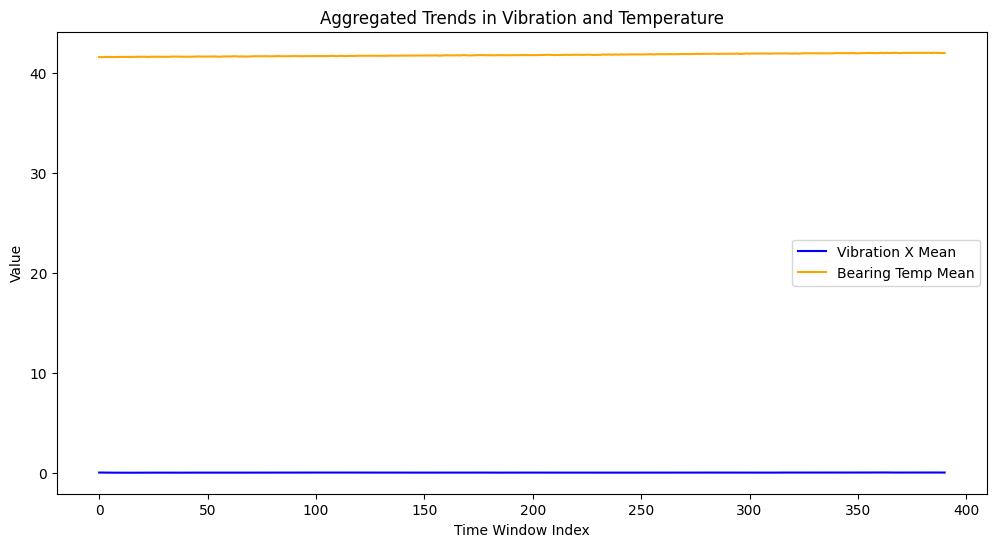

In [16]:
import matplotlib.pyplot as plt
# Plot vibration_x_mean and temp_bearing_mean over time
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['vibration_x_mean'], label='Vibration X Mean', color='blue')
plt.plot(aggregated_data['temp_bearing_mean'], label='Bearing Temp Mean', color='orange')
plt.legend()
plt.xlabel('Time Window Index')
plt.ylabel('Value')
plt.title('Aggregated Trends in Vibration and Temperature')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregated_data)


In [5]:
import pandas as pd

# Assuming X_scaled is the standardized array
columns = [
    'vibration_x_mean', 'vibration_x_std', 'vibration_x_max', 'vibration_x_min',
    'vibration_y_mean', 'vibration_y_std', 'vibration_y_max', 'vibration_y_min',
    'temp_bearing_mean', 'temp_bearing_std', 'temp_bearing_max', 'temp_bearing_min',
    'temp_atmospheric_mean', 'temp_atmospheric_std', 'temp_atmospheric_max', 'temp_atmospheric_min'
]

# Convert scaled data to a DataFrame
X_scaled_df = pd.DataFrame(scaled_data, columns=columns)


In [6]:
X_scaled_df.head()

,vibration_x_mean,vibration_x_std,vibration_x_max,vibration_x_min,vibration_y_mean,vibration_y_std,vibration_y_max,vibration_y_min,temp_bearing_mean,temp_bearing_std,temp_bearing_max,temp_bearing_min,temp_atmospheric_mean,temp_atmospheric_std,temp_atmospheric_max,temp_atmospheric_min
0,1.223378,0.406720,1.040257,0.048439,-0.816333,-0.359809,-1.139816,-0.469860,-1.634801,-0.044472,-1.662845,-1.663733,-0.333235,-0.416319,-0.332694,-0.278840
1,0.503333,-0.371131,1.836724,-1.131650,-1.817620,0.820161,0.330116,-1.333636,-1.704914,-0.879261,-1.729589,-1.663733,-0.282122,0.113272,-0.332694,-0.374901
2,0.134822,1.557969,0.694198,-1.253144,-2.170404,1.758232,1.186324,0.593345,-1.673404,0.090353,-1.588954,-1.640960,-0.439870,-0.702465,-0.446124,-0.374901
3,-0.176045,-0.210523,-1.054776,0.408145,-1.187516,1.530080,1.438295,0.057626,-1.547029,-0.682302,-1.588954,-1.577866,-0.363961,-0.437462,-0.252975,-0.299038
4,-0.291312,-1.007403,-1.582208,1.123317,-0.765620,0.477327,0.215231,0.219652,-1.622168,-1.119219,-1.666636,-1.577866,-0.176897,-1.095912,-0.252975,-0.104894


In [7]:
df = X_scaled_df.copy()

In [8]:
df1 = df.copy()

In [9]:
import numpy as np

# Assuming the dataset is already sorted in chronological order
total_time = 1 # Total hours to failure
num_rows = df.shape[0]  # Number of rows in the dataset
time_interval = total_time / num_rows  # Time interval between rows

# Create a 'timestamp' column
df['timestamp'] = np.linspace(0, total_time, num_rows)

# Assuming the dataset is already sorted in chronological order
total_time = 1  # Total hours to failure
num_rows = df.shape[0]  # Number of rows in the dataset
time_interval = total_time / num_rows  # Time interval between rows

# Create a 'timestamp' column
df['timestamp'] = np.linspace(0, total_time, num_rows)


In [11]:
df.head()

,vibration_x_mean,vibration_x_std,vibration_x_max,vibration_x_min,vibration_y_mean,vibration_y_std,vibration_y_max,vibration_y_min,temp_bearing_mean,temp_bearing_std,temp_bearing_max,temp_bearing_min,temp_atmospheric_mean,temp_atmospheric_std,temp_atmospheric_max,temp_atmospheric_min,timestamp
0,1.223378,0.406720,1.040257,0.048439,-0.816333,-0.359809,-1.139816,-0.469860,-1.634801,-0.044472,-1.662845,-1.663733,-0.333235,-0.416319,-0.332694,-0.278840,0.000000
1,0.503333,-0.371131,1.836724,-1.131650,-1.817620,0.820161,0.330116,-1.333636,-1.704914,-0.879261,-1.729589,-1.663733,-0.282122,0.113272,-0.332694,-0.374901,0.002564
2,0.134822,1.557969,0.694198,-1.253144,-2.170404,1.758232,1.186324,0.593345,-1.673404,0.090353,-1.588954,-1.640960,-0.439870,-0.702465,-0.446124,-0.374901,0.005128
3,-0.176045,-0.210523,-1.054776,0.408145,-1.187516,1.530080,1.438295,0.057626,-1.547029,-0.682302,-1.588954,-1.577866,-0.363961,-0.437462,-0.252975,-0.299038,0.007692
4,-0.291312,-1.007403,-1.582208,1.123317,-0.765620,0.477327,0.215231,0.219652,-1.622168,-1.119219,-1.666636,-1.577866,-0.176897,-1.095912,-0.252975,-0.104894,0.010256


In [13]:
# Assuming failure happens at the 128th hour
failure_time = 1  # hours
df['RUL'] = failure_time - df['timestamp']


In [15]:
df.head()

,vibration_x_mean,vibration_x_std,vibration_x_max,vibration_x_min,vibration_y_mean,vibration_y_std,vibration_y_max,vibration_y_min,temp_bearing_mean,temp_bearing_std,temp_bearing_max,temp_bearing_min,temp_atmospheric_mean,temp_atmospheric_std,temp_atmospheric_max,temp_atmospheric_min,timestamp,RUL
0,1.223378,0.406720,1.040257,0.048439,-0.816333,-0.359809,-1.139816,-0.469860,-1.634801,-0.044472,-1.662845,-1.663733,-0.333235,-0.416319,-0.332694,-0.278840,0.000000,1.000000
1,0.503333,-0.371131,1.836724,-1.131650,-1.817620,0.820161,0.330116,-1.333636,-1.704914,-0.879261,-1.729589,-1.663733,-0.282122,0.113272,-0.332694,-0.374901,0.002564,0.997436
2,0.134822,1.557969,0.694198,-1.253144,-2.170404,1.758232,1.186324,0.593345,-1.673404,0.090353,-1.588954,-1.640960,-0.439870,-0.702465,-0.446124,-0.374901,0.005128,0.994872
3,-0.176045,-0.210523,-1.054776,0.408145,-1.187516,1.530080,1.438295,0.057626,-1.547029,-0.682302,-1.588954,-1.577866,-0.363961,-0.437462,-0.252975,-0.299038,0.007692,0.992308
4,-0.291312,-1.007403,-1.582208,1.123317,-0.765620,0.477327,0.215231,0.219652,-1.622168,-1.119219,-1.666636,-1.577866,-0.176897,-1.095912,-0.252975,-0.104894,0.010256,0.989744


In [54]:
df.columns

Index(['vibration_x_mean', 'vibration_x_std', 'vibration_x_max',
       'vibration_x_min', 'vibration_y_mean', 'vibration_y_std',
       'vibration_y_max', 'vibration_y_min', 'temp_bearing_mean',
       'temp_bearing_std', 'temp_bearing_max', 'temp_bearing_min',
       'temp_atmospheric_mean', 'temp_atmospheric_std', 'temp_atmospheric_max',
       'temp_atmospheric_min', 'timestamp', 'RUL'],
      dtype='object')

In [16]:
import numpy as np
import pandas as pd

# Parameters
window_size = 50  # Number of consecutive rows to form a window

# Assuming 'df' is your dataframe
# Extract features (all columns except 'timestamp' and 'RUL')
feature_columns = df.columns.difference(['timestamp', 'RUL'])
X = df[feature_columns].values  # Feature values
y = df['RUL'].values  # Target values

# Initialize lists to store sliding window data
X_windows = []
y_windows = []



In [17]:
# Create sliding windows
for i in range(len(df) - window_size + 1):
    # Extract a window of features (rows i to i+window_size)
    X_window = X[i:i+window_size]
    # Extract the target (RUL of the last row in the window)
    y_window = y[i+window_size-1]
    
    # Append to lists
    X_windows.append(X_window)
    y_windows.append(y_window)



In [18]:

# Convert to numpy arrays
X_windows = np.array(X_windows)  # Shape: (num_samples, window_size, num_features)
y_windows = np.array(y_windows)  # Shape: (num_samples,)

# Output shapes
print(f"Shape of X_windows: {X_windows.shape}")  # (num_samples, window_size, num_features)
print(f"Shape of y_windows: {y_windows.shape}")  # (num_samples,)

Shape of X_windows: (342, 50, 16)
Shape of y_windows: (342,)


In [19]:
from sklearn.model_selection import train_test_split

# Split sliding window data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, {y_test.shape}")


Training Data Shape: (273, 50, 16), (273,)
Testing Data Shape: (69, 50, 16), (69,)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [21]:
# Define the model
model = Sequential()

# Add LSTM layer
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))  # input_shape=(timesteps, features)
model.add(Dense(1))  # Output layer (predicting RUL)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

c:\Users\Yibabe\Desktop\ball_bearing\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Optionally, print training progress
print(f"Training Loss: {history.history['loss'][-1]}")


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - loss: 0.0804 - val_loss: 0.0231
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0199 - val_loss: 0.0085
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 8.4815e-04 - v

In [23]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 3.5480e-04
Test Loss: 0.0003778792452067137


In [24]:
predictions = model.predict(X_test)
print(f"Predictions: {predictions[:5]}")
print(f"True Values: {y_test[:5]}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step
Predictions: [[0.28474844]
 [0.5883247 ]
 [0.577043  ]
 [0.7919934 ]
 [0.5707452 ]]
True Values: [0.26666667 0.57692308 0.58461538 0.76666667 0.55128205]


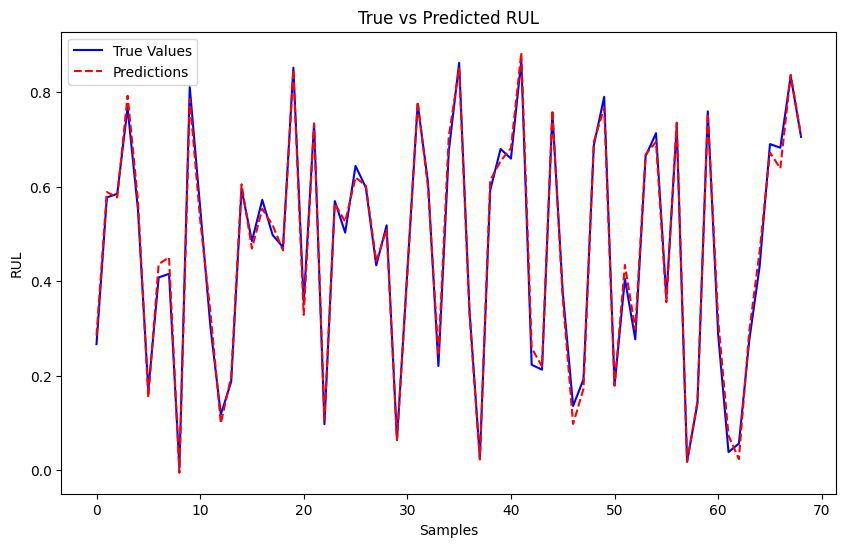

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='red', linestyle='dashed')
plt.legend()
plt.title('True vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.show()


In [27]:
#save the model sample 
model.save(r"C:\Users\Yibabe\Desktop\ball_bearing\notebooks\bearing_rul_model.keras")


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.016119334866392786
Root Mean Squared Error: 0.019439116373038634
R² Score: 0.9938623234751902


 Visualize Predictions vs True Values

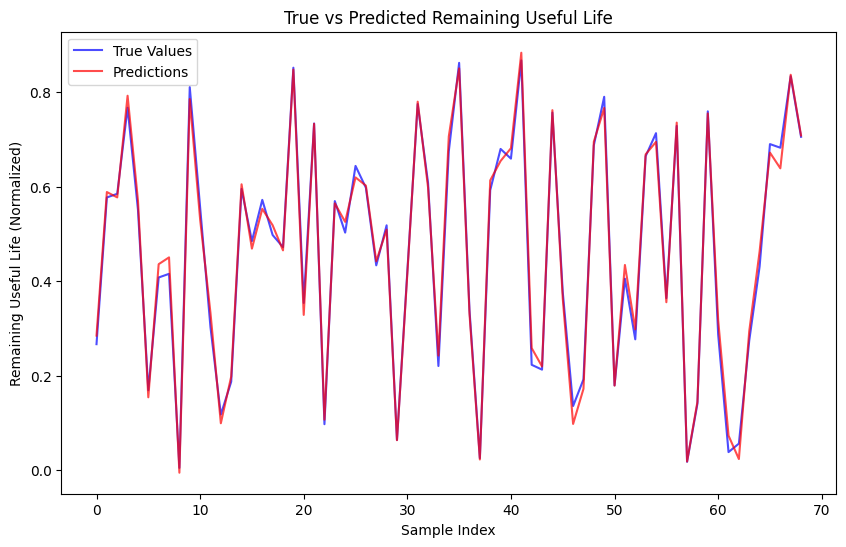

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue', alpha=0.7)
plt.plot(predictions, label='Predictions', color='red', alpha=0.7)
plt.legend()
plt.title('True vs Predicted Remaining Useful Life')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (Normalized)')
plt.show()
